<a href="https://colab.research.google.com/github/Nathan2041/random/blob/main/Student_SketchRecognition_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

In [ ]:
#@title **🏗 Setup Cell** {"display-mode":"form", "form-width":"25%"}
#@markdown **Run this to import libraries and download data!**

from google.colab import files
from base64 import b64decode
import zipfile
import io
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

import cv2
from google.colab.patches import cv2_imshow
from google.colab.output import eval_js
from IPython.display import HTML, Image, display, Javascript


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def capture_image(filename):
  try:
    take_photo(filename)
    print('Saved to {}'.format(filename))

    # Show the image which was just taken.
    display(Image(filename))
  except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))



def get_image_classification(image_file_name='test.jpg', display_image=True):
  image = cv2.imread(image_file_name)
  if display_image:
    cv2_imshow(image)
  return classify_image(image_file_name)['classification']

def get_image_predictions(image_file_name='test.jpg'):
  return classify_image(image_file_name)['predictions']

def get_best_prediction():
  return max(get_image_predictions())

def classify_image(image_file_name):
  image = cv2.imread(image_file_name)
  image = cv2.resize(image,(224,224)).astype('float32')

  image = np.reshape(image,(1,224,224,3))
  image = image / 255

  predictions = model.predict(image)[0]

  pred_class = class_names[np.argmax(predictions)]

  return {'classification': pred_class, 'predictions': predictions}

#Exploring Sketch Recognition: Applications and Techniques

We've learned so much about AI in the past few weeks - and now let's focus our new skills on an AI project!

During the coming sessions, we will learn all about sketch recognition.

We will learn:

- What sketch recognition is useful for
- How we may approach sketch recognition
- How does sketch recognition differ from classifying images
- How to collect and interpret sketch data
- How to use sketch data to be creative!

**Discuss:** What are some potential applications of sketch recognition?



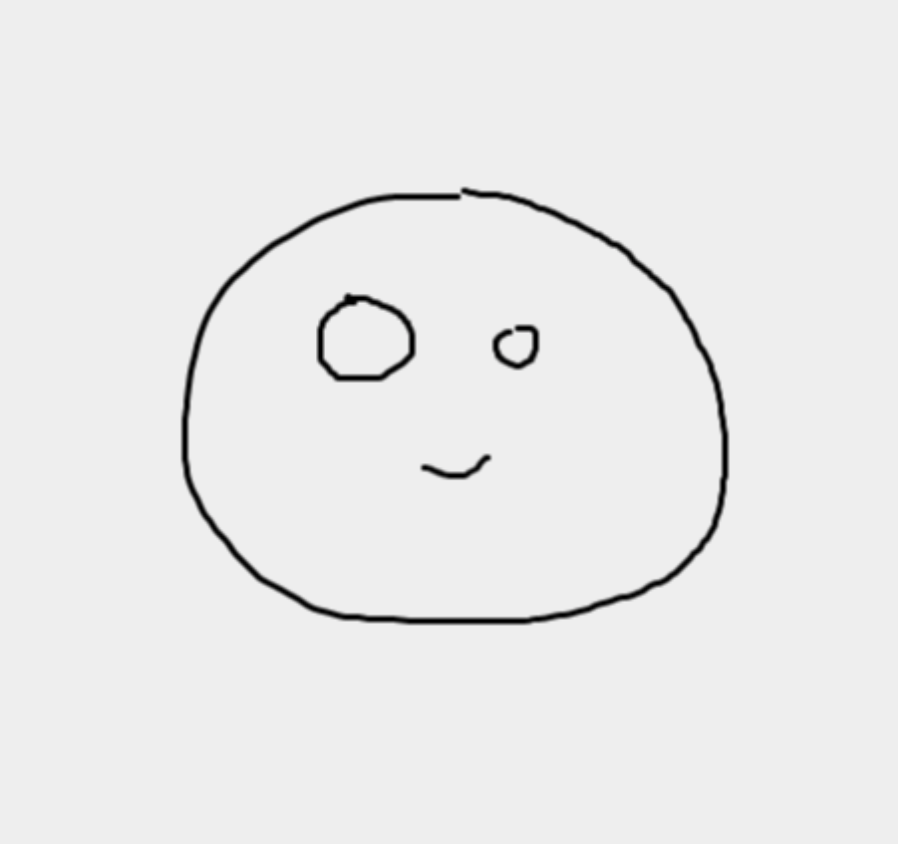

#Introducing Sketch Recognition with Google QuickDraw
**Let's start with a fun activity using [Google Quickdraw](https://quickdraw.withgoogle.com/)!**

**Discuss:**
*   How do you think Google QuickDraw works?
*   Where does the data come from?



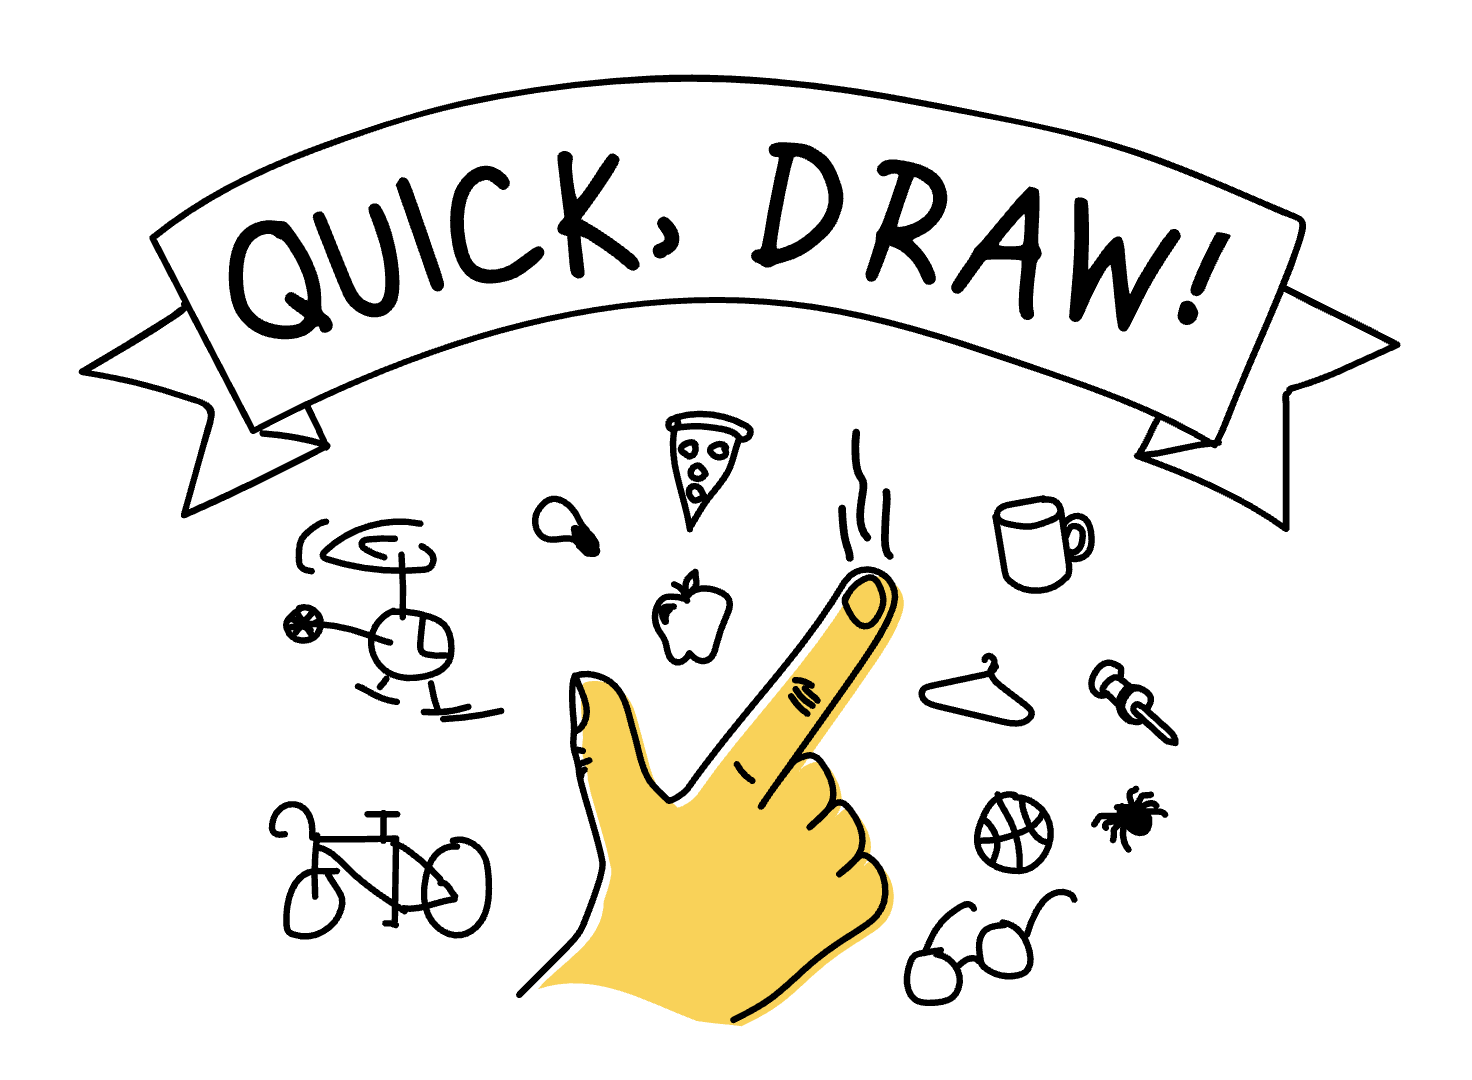

#Why is Sketch Recognition Important?
Drawing is one of the oldest and intuitive methods used by humans to communicate ideas.

The oldest discovered cave painting is 44,000 years old. Children often learn to how draw before learning how to read and write. Even technical ideas, like electrical wiring, can be easily conveyed through a sketched diagram.





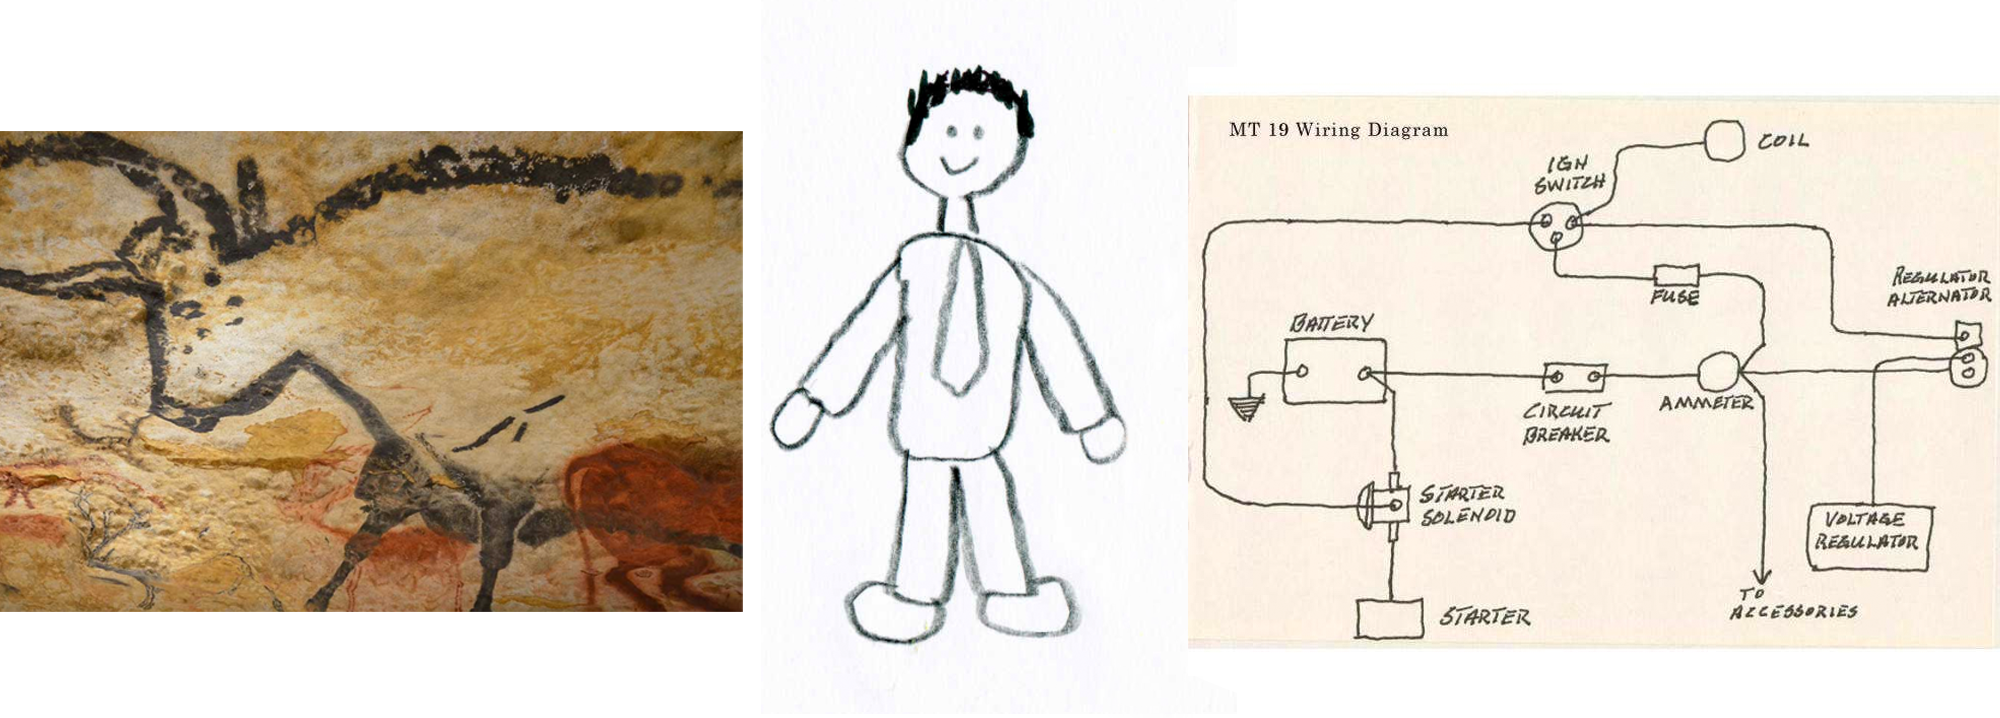

**Sketch recognition is a useful and interesting area to explore because:**
- Sketching is a fast and easy way for humans to brainstorm and convey ideas. A picture is worth a thousand words, and drawing is much more intuitive than using other software to make graphics!
- Sketch data is more simple, and often times more computationally simple to deal with than photographs. Sketches are usually several lines on a plain background, as opposed to millions of pixels in photograph.
- We can keep track of *how* people draw by keeping track of the order of their strokes!

**Some applications include:**
- Converting handwriting to text ([Demo - Watch until 1:20](https://youtu.be/PHvzBRe7hIc?t=60))
- Understanding characters from different languages ([Chinese character input on WeChat - Watch until 0:15](https://www.youtube.com/watch?v=Avpl0IZjDN8))
- Converting a sketch to a PowerPoint diagram ([Auxi AI](https://www.auxi.ai/))
- Converting sketches to an app ([Microsoft Ink to Code](https://www.microsoft.com/en-us/garage/profiles/ink-to-code/))
- Gesture recognition on touch screen
- Putting captions on art for the visually impaired

**Sketch recognition may be a challenging problem because:**
- Sketching is more abstract than photographs.
- Different people may draw the same object in different ways!

**Discuss**: What ideas do you have as to how to recognize sketches?

# Starting Simple - Recognizing Shapes with Google's Teachable Machine






For this activity, you will need the following materials:
- A **dark** writing utensil, like a pencil, black pen, or black marker.
- About 15 sheets of white paper


**Discuss:** What kind of data do we need to collect to make a Teachable Machine model that can classify squares, triangles, and circle sketches? How do we make sure that our model can generalize?


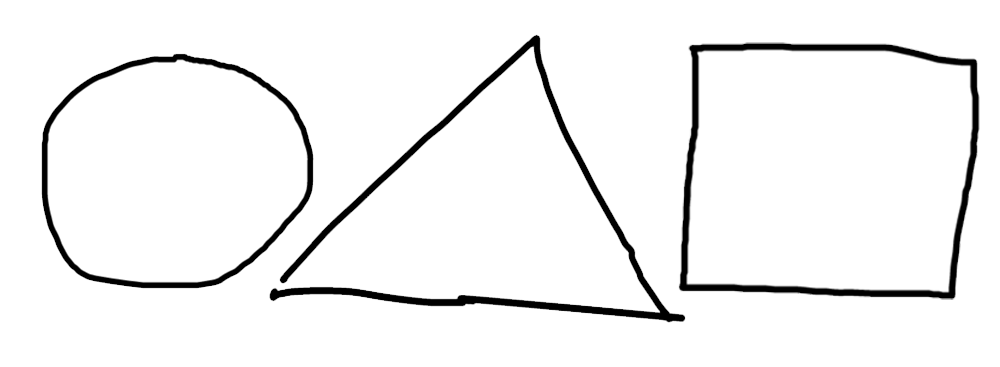

# Collecting Diverse Data for Our Model

**To begin, let's make an AI model using [Teachable Machine](https://teachablemachine.withgoogle.com/) to help us classify drawings of circles, squares, and triangles!**



1. Make a class for ```Circle```, ```Square```, and ```Triangle```.
2. For each shape, draw the shape on a piece of white paper. We will be doing 5 different examples of each shape class! Make sure each example is of different sizes and shape. They can be rough drawings, and don't need to be perfect! What's important is that they are dark on a white background, and that your data is diverse!
3. For each shape class, collect at least 1000 samples. That's about 200 images of each example! Make sure you rotate the image in different ways, move your paper back and forth!
4. Once you're done, train the model, and test it out!
5. While you're waiting, check out the Under the Hood tab under Advanced!
5. Finally, export your model!







**Reminder**: When you export, make sure you select the Tensorflow tab and Keras before you download your model.
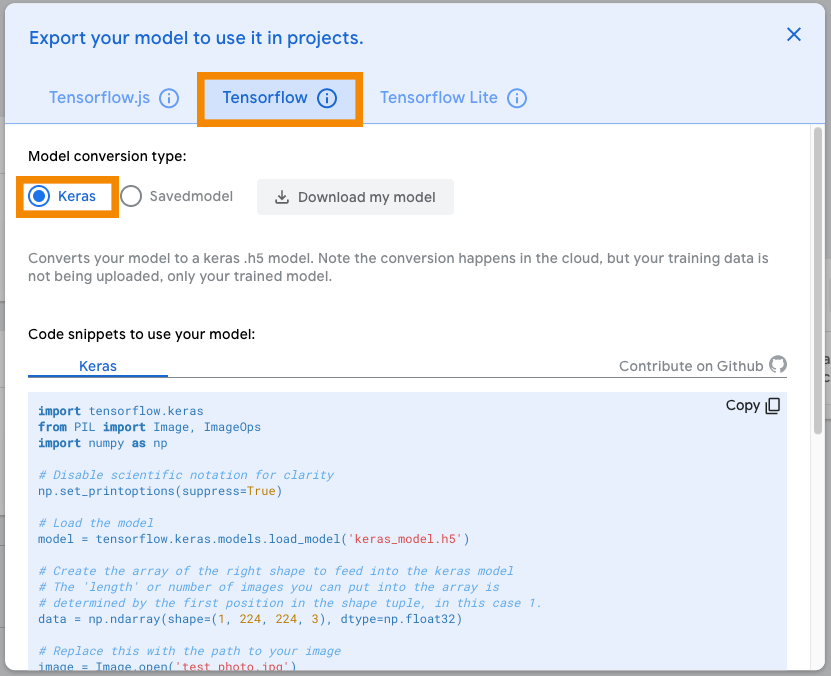

#Importing the Model to Google Colab

Great! Now, our AI model is ready to be tested out!

#Importing your model


First, upload the model that you have downloaded from Teachable Machine. It should be a ```.zip``` file.

**Wait until it says 100% done before moving on to the next exercise!**

In [ ]:
#@title Run this cell to upload and extract your model into Colab {"display-mode":"form", "form-width":"25%"}

version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

# upload model zip file
uploaded = files.upload()

# extract model
np.set_printoptions(suppress=True)
try:
  file_name = list(uploaded.keys())[0]
  print("Extracting model...")
  with zipfile.ZipFile(file_name, 'r') as zip_ref:
      zip_ref.extractall('')

  class_names = np.genfromtxt("labels.txt", dtype="str", delimiter='\n')
  for i in range(len(class_names)):
    class_names[i] = ' '.join(class_names[i].split(' ')[1::])

  predictions = [0.0] * len(class_names)

  model = keras.models.load_model('keras_model.h5', compile=False)
  print("Success! Model Extracted!")
except (IndexError, NameError):
    print("Oops! Cannot find file to unzip. Please try uploading a zip file for your model")

In [ ]:
#@title Were you able to load your model? {"display-mode":"form", "form-width":"25%"}
#@markdown *(If not, set `model_loaded` to "No" and run the cell to extract Demo Model)*

model_loaded = "Yes" #@param ["Yes", "No"]
if model_loaded == "No":
  NEED_INSTRUCTOR = True
else:
  NEED_INSTRUCTOR = False

import zipfile
import requests
import numpy as np
import cv2
import tensorflow as tf

version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

try:
  if NEED_INSTRUCTOR:
    url = 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Pioneers/Sketch%20Recognition/instructor_sketch_model.zip'
    local_zip_path = 'instructor_sketch_model.zip'

    print("Downloading model...")
    response = requests.get(url)
    with open(local_zip_path, 'wb') as f:
        f.write(response.content)

    print("Extracting model...")
    with zipfile.ZipFile(local_zip_path, 'r') as zip_ref:
        zip_ref.extractall('')

    class_names = np.genfromtxt("labels.txt", dtype="str", delimiter='\n')
    for i in range(len(class_names)):
      class_names[i] = ' '.join(class_names[i].split(' ')[1::])

    predictions = [0.0] * len(class_names)

    model = keras.models.load_model('keras_model.keras', compile=False)
    print("Success! Model Extracted!")
  else:
    print("It looks like your model was able to load, so no need for the Demo Model!")
except Exception as e:
  print(f"An error occurred: {e}")
  if NEED_INSTRUCTOR:
    try:
      with zipfile.ZipFile('instructor_sketch_model.zip', 'r') as zip_ref:
        zip_ref.extractall()

      class_names = np.genfromtxt("labels.txt", dtype="str", delimiter='\n')
      for i in range(len(class_names)):
        class_names[i] = ' '.join(class_names[i].split(' ')[1::])

      predictions = [0.0] * len(class_names)

      model = keras.models.load_model('keras_model.keras', compile=False)
      print("Success! Instructor Model Extracted!")
    except Exception as inner_e:
      print(f"Oops! Cannot find file to unzip. Please try uploading a zip file for your model. Inner error: {inner_e}")


#Testing the Image Classification Model

###Capture Test Image

Let's test our our model with a sample image! To capture an image from your device's camera, run the code cell below.

In [ ]:
capture_image("test.jpg")

###Predicting the Image Class

Calling a function called ```get_image_classification()``` can help us see what classification our model gives us from our test image!

This may take a minute. As you wait, try to guess how your model will classify this image!

In [ ]:
classification = get_image_classification()
print(classification)

**Discuss:** Did your model correctly classify the test image? Why or why not?

**What happens when your test image is something different from your training dataset?**

### Try this method if webcam doesn't work! (make sure to extract the Default Instructor Model first)

In [ ]:
#@title Test Sketch and Obtain Classification {"display-mode":"form", "form-width":"25%"}

canvas_html = """
<canvas width=%d height=%d></canvas>
<br>
<button>Save Image</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
ctx.fillStyle = "#eeeeee";
ctx.fillRect(0, 0, canvas.width, canvas.height);
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""


def test_sketch(w = 224, h = 224, line_width = 1):
  path = ''
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  filename = 'test.png'
  with open(os.path.join(path, filename), 'wb') as f:
    f.write(binary)

test_sketch()

import seaborn as sns
import numpy as np
import cv2
classification = get_image_classification(image_file_name='test.png', display_image=False)
predictions = get_image_predictions(image_file_name='test.png')
print("classification: " + classification)
print("predictions: ", predictions)


#Analyzing Image Classification Output (Optional)

Now let's take a closer look at how the model decided what to classify your image!

In [ ]:
capture_image("test.jpg")

### Getting the Class Names

**Python lists** are used to store multiple items in a single variable. **In lists, the order of the items matter!**

The variable ```class_names``` is a Python list that holds all of our class names. Try printing it!

In [ ]:
###YOUR CODE HERE


**Discuss:** How many items are in this list? How does this compare to the number of classes you made when you trained your model in Teachable Machine?

We can use then ```len()``` function on any list to find out how many items are in the list without having to manually count.

Try running the ```len()``` function on ```class_names```!

In [ ]:
###YOUR CODE HERE

###Getting Class Predictions

Calling a function called ```get_image_predictions()``` can help us see the corresponding probabilities for each class our model gives us from our test image! This will give us another list.



In [ ]:
predictions = get_image_predictions()
print(predictions)

**Discuss:** What do these numbers mean? How is the order of these numbers important?

Hint: Compare the order of these numbers with the order of the class names

Now, try using ```len()``` function on ```predictions``` to see the length of this list!

**Discuss:** Before you run the code - what do you expect the length of ```predictions``` to be?

In [ ]:
###YOUR CODE HERE###

###Plotting Classification Probabilities

Now, let's visualize how confident our model is by using a bar graph!
We can use ```sns.barplot()``` to make a bar graph.

Fill in the code to make a bar chart!

* We want the ```class_names``` to be our ```x```, and ```predictions``` to be
our ```y```.

* We want the "Class Names" to be our x-axis label, and "Predictions" to be
our y-axis label.



In [ ]:
print(predictions)
print(class_names)

plt.ylim(0.00, 1.00)

### YOUR CODE HERE

chart = sns.barplot(x = None, y = None) # <- REPLACE THE Nones WITH THE CORRECT DATA FOR X AND Y
chart.set(xlabel="FILL ME IN", ylabel = "FILL ME IN") # <- FILL IN THE X-AXIS AND Y-AXIS LABELS

####


plt.show()


**Discuss:** How confident was your model of its final image classification? How might this influence the output of your app?

To go further, try evaluating what images are misclassified and try retraining your model on Teachable Machine!

#Congratulations!
Congratulations! Now we have an machine learning app that can classify different kinds of sketches of shapes.

How can we go further?
In the next steps of this project, we will explore more complex digital sketches that go beyond just shapes. We will learn how to analyze and explore a large sketch dataset, and use that to generate our own art!